## Final Project Submission

Please fill out:
* Student name: Mark Ngige Ndung'u
* Student pace: Full time
* Scheduled project review date/time: 13/03/2023 00:00 EAT
* Instructor name: William Okomba
* Blog post URL:


<h1> Introduction

<h3>Problem Statement

In January 2020, Microsoft Inc. ("the Company") decides to enter the movie industry and creates a movie studio. 
The company approaches consultancy XYZ to provide a data-driven understanding of theindustry and characteristics 
of a successful movie.
The Company is after actionable insights to shape their new venture.

<h3> Our Approach

We will first investigate the notion of profit and profit margin within the movie industry.

We will then explore the characteristics of a successful movie and seek to answer the following questions:

**~** What budget should be allocated?

**~** What movie genres are currently performing best?

**~** What is the optimal movie runtime

**~** What should the release date be to maximise success?

**~** What Original Language to consider for Production

<h3> Data Sources

Data for this project was obtained from the following repository and also saved in ZippedData folder in this repository.

The data comes from:
 
 **~** Box Office Mojo
 
 **~** IMDB
 
 **~** Rotten Tomatoes
 
 **~** TheMovieDB.org
 
 **~** The-numbers

<h3> Methodology

The process can be divided into two main parts.

Section 2 focuses on data preparation.
The steps include:

**~** Importing libraries

**~** Reading provided data

**~** Dealing with missing values and cleaning data

**~** Joining datasets

Section 3 focuses on visualisations and insights.
For each characteristic we will be:

**~** Conducting feature engineering where applicable

**~** Creating visualisations

**~** Drawing conclusions

**~** Providing recommendations

Finally section 4 sets out a summary of our findings, key actionable insights and suggested future work.

<h1>Use of EDA for Precise Bussiness Desion-Making

<h4>Import relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import csv
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Data Preview before analysis

In [2]:
#Importing/Loading file as a Dataframe.
movie_gross_df = pd.read_csv("bom.movie_gross.csv")
movie_gross_df.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [3]:
#Check the shape of the Dataframe.
movie_gross_df.shape

#The above code shows it has 3387rows and 5columns.

(3387, 5)

In [4]:
#Checking if there are missing values in the dataset and also the datatypes.
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the .info() method, we learn that Studio, Domestic_gross and Foreign_gross columns have missing values

In [5]:
#Loading file as a Dataframe.
movie_info_df=pd.read_csv("rt.movie_info.tsv", sep='\t')
movie_info_df.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


In [6]:
# Check the shape of the DataFrame.
movie_info_df.shape

#The shape attribute shows us it has 1560rows and 12columns.

(1560, 12)

In [7]:
#Check for missing values and datatypes.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In this dataframe, all columns have missing values except for the id column. Some afew entries while others
lacking over three quaters of the data.All this we will sort during data cleaning.

In [8]:
#Importing file as a Dataframe.
reviews_df = pd.read_csv("rt.reviews.tsv", sep ='\t', encoding ='latin')
reviews_df.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


In [9]:
#Check the shape of the DataFrame
reviews_df.shape

#Has 54432rows and 8columns

(54432, 8)

In [10]:
#check for missing data.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


There are missing values in the review, rating, critic and publisher columns.

In [11]:
#Importing/Loading file as a Dataframe.
movies_df = pd.read_csv("tmdb.movies.csv")
movies_df.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [12]:
#check the shape and presence of missing values
print(movies_df.shape)
print(movies_df.info())

#It has 26517rows and 10columns as its shape.

(26517, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


Goodnews....whooa!!,the above data set has no missing values.

In [13]:
#Importing/Loading file as a Dataframe.
movie_budgets_df = pd.read_csv("tn.movie_budgets.csv")
movie_budgets_df.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [14]:
#Check for the shape and presence of missing values.
print(movie_budgets_df.shape)
print(movie_budgets_df.info())

#It has 5782rows and 6columns.

(5782, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


Again....Hurray!!!.The dataframe has no missing values.

<h2>Retrieving and Preview Data from SQlite Database

<h4>(1.)Connecting to the database

In [15]:
#Connect to the database
conn = sqlite3.connect("im.db")

#Create a cursor object
cursor = conn.cursor()


<h4>(2.)View list of tables

In [16]:
# Execute a query to get a list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the results as a list of tuples
tables = cursor.fetchall()

# Print the list of tables
for table in tables:
    print(table[0])


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


From the above query we are able to view the list of tables present in the Database.This enables us to know where to access
which data from and help to create relation between the above Datasets and the Database contents.

<h4>(3.) Selecting data from the tables for preview.

In [17]:
pd.read_sql("""SELECT * FROM movie_basics;""", conn).head(2)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [18]:
pd.read_sql("""SELECT * FROM directors;""", conn).head(2)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585


In [19]:
pd.read_sql("""SELECT * FROM known_for;""", conn).head(2)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241


In [20]:
pd.read_sql("""SELECT * FROM movie_akas;""", conn).head(2)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


In [21]:
pd.read_sql("""SELECT * FROM movie_ratings;""", conn).head(2)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [22]:
pd.read_sql("""SELECT * FROM persons;""", conn).head(2)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"


In [23]:
pd.read_sql("""SELECT * FROM principals;""", conn).head(2)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


In [24]:
pd.read_sql("""SELECT * FROM writers;""", conn).head(2)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726


Now that we have veiwed the tables in the database, we are able to identify the Primary keys, Foreign keys,the columns present and view any missing values. If we were to check for columns only, a list comprenssion could have been more efficient and tidy.


<h1> Data Preparation and Cleaning 

After previewing the data and knowing it's contents, it time to make the data usable for attaining an uptimum level of accuracy. We could use it as it is, but there is a rule saying "Garbage In Garbage Out" and Garbage results are bad for
strategic Business decisions.
I will be cleaning all of the above datasets so that they can be ready for the relevant analysis.

<h5> (1..) movie_gross Datafame

In [25]:
#Start by removing of duplicates in the dataframe
movie_gross_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [26]:
# Act on missing values.
#Calculate the percentage of missing values in the relevant columns
perc_miss1 = (movie_gross_df.isna().sum() / len(movie_gross_df)) * 100
perc_miss1

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

We get a result show the percentages of data missing in each Column. I get to decide on how to deal with the
missing values based on the percentage and the impact of my choosen method.

For studio removing the offending rows is the suitable option,same to the domestic_gross
column.For the foreign_gross column since it lacks Almost 40% of it's data i wil replace 
with the mean value since dropping leads to remaining with 60% of the available data.

In [27]:
#Droping rows with missing values in the Studio and Domestic_gross columns
movie_gross_df.dropna(axis=0, subset=['studio', 'domestic_gross'], inplace=True)

# Convert the foreign_gross to an integer from an object to be able to calculate mean.
movie_gross_df['foreign_gross'] = pd.to_numeric(movie_gross_df['foreign_gross'], errors='coerce').fillna(0).astype(int)
# Calculate mean value
# Calculate the mean of non-zero values in the column
mean_value = round(movie_gross_df.loc[movie_gross_df['foreign_gross'] != 0, 'foreign_gross'].mean())

# Replace the 0 values with the mean value
movie_gross_df.loc[movie_gross_df['foreign_gross'] == 0, 'foreign_gross'] = mean_value
#check if there is still missing Values
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   int32  
 4   year            3356 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 144.2+ KB


<h5> (2..) movie_info_df

In [28]:
#Start by removing of duplicates in the dataframe
movie_info_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [29]:
# Act on missing values.
#Calculate the percentage of missing values in the relevant columns
perc_miss2 = (movie_info_df.isna().sum() / len(movie_info_df)) * 100
perc_miss2

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

The dataframe has missing values an all columns except the id column. It also has plenty of **Irrelevant Data Columns**.
After choosing the relevant columns to be used for analysis, as part of the data cleaning i will drop most columns some 
missing between 65% - 78% of the data. In alignment with the Business problem i hope to solve, i will only be using the Id, rating, genre and Runtime columns.

In [30]:
#Drop the Irrelevant Columns
movie_info_df.drop(columns=['synopsis', 'director','writer','theater_date', 'dvd_date', 
                            'currency', 'box_office', 'studio'], inplace=True)

# Drop rows with mising values since the remaining columns have a maximum of 2% missing.
movie_info_df.dropna(subset=['rating', 'genre', 'runtime'], inplace=True)

<h5>(3..)reviews_df

In [31]:
#Droping all The Duplicates keeping ony the first copy.
reviews_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54423 entries, 0 to 54422
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54423 non-null  int64 
 1   review      48867 non-null  object
 2   rating      40907 non-null  object
 3   fresh       54423 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54423 non-null  int64 
 6   publisher   54114 non-null  object
 7   date        54423 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [32]:
# Act on missing values.
#Calculate the percentage of missing values in the relevant columns
perc_miss3 = (reviews_df.isna().sum() / len(reviews_df)) * 100
perc_miss3

id             0.000000
review        10.208919
rating        24.835088
fresh          0.000000
critic         4.985025
top_critic     0.000000
publisher      0.567775
date           0.000000
dtype: float64

According to the percentage of missing values, the best way to clean is to drop the rows with missing values.This being the 
the largest dataframe it will still have enough data for analysis.

In [33]:
#Droping rows with missing values
reviews_df.dropna(subset=['review', 'rating', 'critic', 'publisher'], inplace=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54415
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


<h5> (4..)movies_df

In [34]:
#Droping all The Duplicates keeping ony the first copy.
movies_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


The Dataframe is clean and ready for analysis, it does not contain any missing values.

<h5>(5..)movie_budgets_df

In [35]:
#Drop any duplicates available
movie_budgets_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This Dataframe is now ready for analysis

<h3> Analysis and Visualizations

<h6> Domestic Vs Foreign markets over the years.

This dataset will be used to find the trend of the gross values over the years.
It will help reason which markets are more profitable.

In [36]:
# group the dataframe by years 
grouped_movie_gross = movie_gross_df.groupby('year')


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


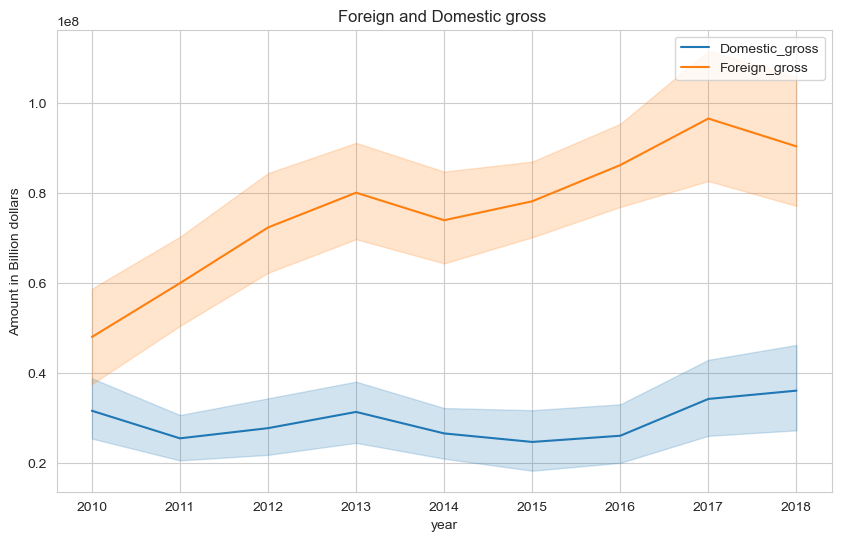

In [37]:
#Plot a linegraph of year vs amount in billion dollars of both domstic and foreign gross.
# Set up the Seaborn figure
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the two line graphs
sns.lineplot( movie_gross_df['year'], movie_gross_df['domestic_gross'], data=movie_gross_df, ax=ax, label='Domestic_gross')
sns.lineplot(movie_gross_df['year'], movie_gross_df['foreign_gross'], data=movie_gross_df, ax=ax, label='Foreign_gross')

# Set axis labels and title
ax.set_xlabel('year')
ax.set_ylabel('Amount in Billion dollars')
ax.set_title('Foreign and Domestic gross ')

# Add a legend
ax.legend()

#Saving the plot as an image
fig.savefig('year vs gross.jpg', bbox_inches='tight', dpi=150)

# Show the plot
plt.show();

<h4> Runtime for movies.

We will use the movie_info_df and some tables in the imdb for this analysis

In [38]:

# Strip the 'min' string from the 'runtime' column and convert to numeric values
movie_info_df['runtime'] = pd.to_numeric(movie_info_df['runtime'].str.replace(' minutes', ''))

# Calculate the mean of the 'runtime' column
mean_runtime = movie_info_df['runtime'].mean()

# Print the average runtime
print(mean_runtime)


104.07536041939711


We have a average runtime of 104 minutes.
Now we will find the distribution using top 150 movies and their runtime to find a suitable reccommendation.

In [39]:
# sort the data with rating and pick top 150 movies.
#Filter the dataframe to only include rows where the 'rating' column is 'R'
filtered_df = movie_info_df.loc[movie_info_df['rating'] == 'R']

# Sort the filtered dataframe by the 'rating' column in descending order
sorted_df = filtered_df.sort_values('rating', ascending=False)

# Pick the top 150 rows
top_150 = sorted_df[:150]
#reset index
top_150 = top_150.reset_index(drop=True)

print(top_150)

       id rating                                              genre  runtime
0       1      R                Action and Adventure|Classics|Drama      104
1    1179      R                                       Comedy|Drama      119
2    1322      R                 Horror|Science Fiction and Fantasy       82
3    1320      R                                              Drama      111
4    1308      R  Action and Adventure|Art House and Internation...      126
..    ...    ...                                                ...      ...
145  1840      R                                      Drama|Romance      118
146  1835      R                                       Comedy|Drama      105
147  1834      R                  Drama|Science Fiction and Fantasy      106
148  1832      R                                              Drama      118
149  1809      R                                      Comedy|Horror       95

[150 rows x 4 columns]


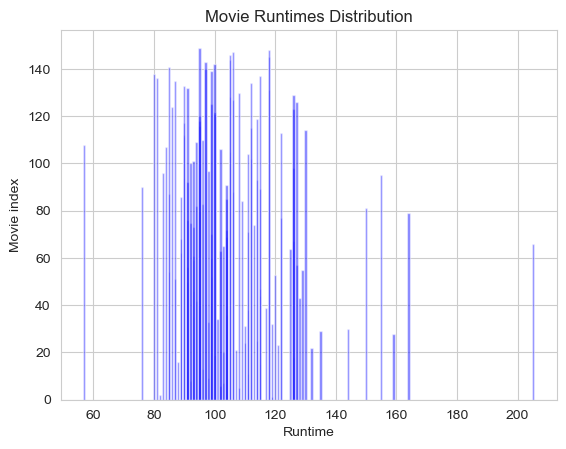

In [40]:
# create a bar plot of movie runtimes
plt.bar(top_150['runtime'], top_150.index, color='blue', alpha=0.5,)

# set axis labels and title
plt.xlabel('Runtime')
plt.ylabel('Movie index')
plt.title('Movie Runtimes Distribution')

plt.savefig('Movie Runtime.png', bbox_inches='tight')
# display the plot
plt.show()

<h5> Genres

The goal is to determine the top selling genres currently.

In [41]:
#Identify the diffrent genres
movie_info_genres = list(set(movie_info_df['genre'].str.split('|').sum()))

# Count the number of occurrences of each string in the 'genre' column
genre_counts = []
count = 0
stripped_top_150 = top_150['genre'].str.split('|').sum()
#initialize an empty dictionary to store the results
genre_dict = {}

# Loop over the items in list_a
for item in movie_info_genres:
    # Count the number of occurrences of the item in list_b
    count = stripped_top_150 .count(item)
    # Add the item and count to the results dictionary
    genre_dict[item] = count
    
    sorted_genre = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)

# Print the results
for item, count in sorted_genre:
    print(f'{item}: {count}')
        
        

Drama: 103
Comedy: 50
Mystery and Suspense: 40
Action and Adventure: 28
Art House and International: 25
Horror: 21
Romance: 12
Science Fiction and Fantasy: 12
Classics: 8
Special Interest: 5
Western: 4
Documentary: 2
Gay and Lesbian: 1
Animation: 1
Kids and Family: 1
Cult Movies: 0
Anime and Manga: 0
Faith and Spirituality: 0
Musical and Performing Arts: 0
Sports and Fitness: 0
Television: 0


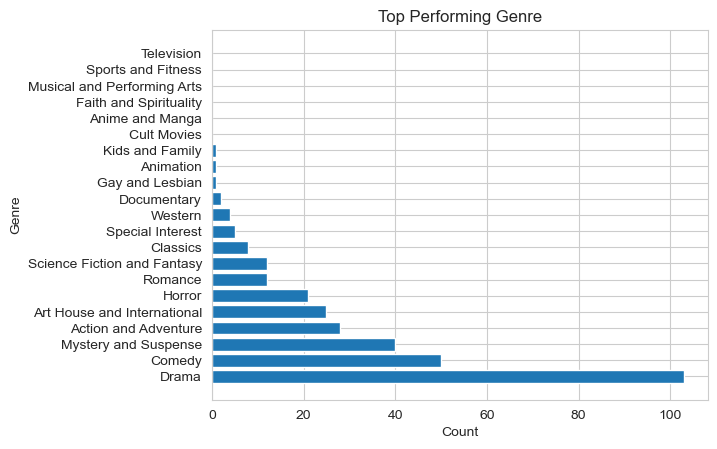

In [42]:
#PLOT a bar graph of the distribution of genre in top gross best 150 movies

# Extract the keys and values from the list
keys = [item[0] for item in sorted_genre]
values = [item[1] for item in sorted_genre]

# Create a horizontal bar graph
fig, ax = plt.subplots()
ax.barh(keys, values)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top Performing Genre')

plt.savefig('Top performing genres.png', bbox_inches='tight')
# Show the plot
plt.show()

<h5> Budget

I will be doing analysis of the production budget for cool fun-loved movies.

In [43]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
# Sort the values by the production budget

# Convert the 'production_budget' column to numeric values
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('[\$,]', '', regex=True).astype(int)

# Sort the DataFrame by the values of the 'production_budget' column in descending order
movie_budgets_df_sorted = movie_budgets_df.sort_values(by='production_budget', ascending=False)
#Pick top 100 rows
top_100 = movie_budgets_df_sorted[:100]
# Pick the top 100 rows
top_1o0 = sorted_df[:100]
#reset index
top_100 = top_100.reset_index(drop=True)


In [57]:
# Convert the 'worldwide_gross' column to numeric values
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

In [45]:
#find  maximum  production budget
maximum_production_budget = movie_budgets_df['production_budget'].max()
print('maximum_production_budget:' ,maximum_production_budget)

maximum_production_budget: 425000000


In [46]:
average_pruduction_budget = movie_budgets_df['production_budget'].mean()
print('average_pruduction_budget', average_pruduction_budget)

average_pruduction_budget 31587757.0965064


In [61]:
#Calcuate max earning by a movie 
maximum_worldwide_gross =  movie_budgets_df['worldwide_gross'].max()
print('maximum_worldwide_gross:', maximum_worldwide_gross)

maximum_worldwide_gross: 2776345279.0


In [64]:
#Calculate Profits
profit = maximum_worldwide_gross - maximum_production_budget
print('profit:',profit)

profit: 2351345279.0


<h5> Release date

Here i will be analysing the appropriate date for releasing movies, months to be precise.

In [47]:
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [48]:
#Sort the data with the popularity column
movies_df_sorted = movies_df.sort_values(by='popularity', ascending=False)

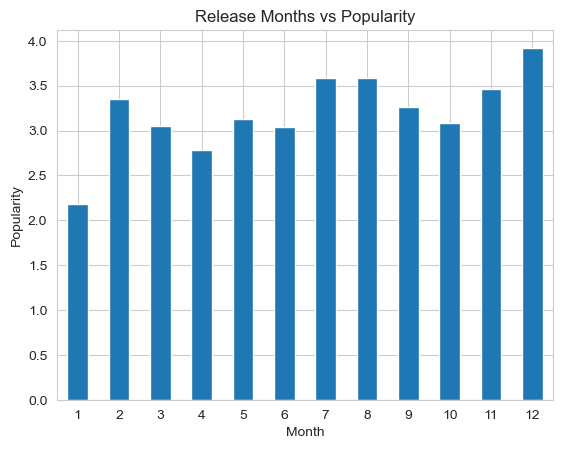

In [49]:
# convert date column to datetime format
movies_df_sorted['release_date'] = pd.to_datetime(movies_df_sorted['release_date'])

# extract month information into a new column
movies_df_sorted['month'] = movies_df_sorted['release_date'].dt.month

# compute popularity by month using mean
popularity_by_month = movies_df_sorted.groupby('month')['popularity'].mean()

# create a bar plot
popularity_by_month.plot.bar(x='month', y='popularity', rot=0)
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.title('Release Months vs Popularity')
plt.savefig('Release Months vs Popularity', bbox_inches='tight')
plt.show()

<h5> Original language

I will be analysing the popularity of a movie based on the Original Language of movie.

In [50]:
# Using the sorted dataframe according to popularity.
movies_df_sorted.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,month
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,4
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,10
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048,12
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,12
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,5


In [51]:
# get unique languages from the 'original_language' column
unique_languages = movies_df_sorted['original_language'].unique()

# print the unique languages
print(unique_languages)


['en' 'ja' 'es' 'fr' 'ar' 'nl' 'zh' 'de' 'ko' 'no' 'cn' 'da' 'sv' 'ru'
 'it' 'th' 'sr' 'id' 'pt' 'te' 'hi' 'fa' 'uk' 'pl' 'fi' 'tr' 'hu' 'lv'
 'nb' 'ta' 'kn' 'ca' 'sw' 'et' 'is' 'he' 'tl' 'ro' 'ml' 'el' 'hz' 'lt'
 'af' 'mi' 'ur' 'yi' 'ku' 'hr' 'lo' 'sq' 'vi' 'eu' 'ka' 'cs' 'xx' 'mr'
 'pa' 'bn' 'ab' 'bg' 'ne' 'xh' 'sn' 'sl' 'kk' 'bs' 'hy' 'ps' 'gu' 'si'
 'dz' 'cr' 'bo' 'ky' 'cy' 'ha']


In [52]:
#Get the number of movie in particular languages
counts = movies_df_sorted['original_language'].value_counts(normalize=False).loc[unique_languages]
sorted_counts = counts.sort_values(ascending=False)

In [53]:
#Sort and get the top 10 languages
first_10 = sorted_counts.head(10)

In [54]:
first10_language = first_10.index

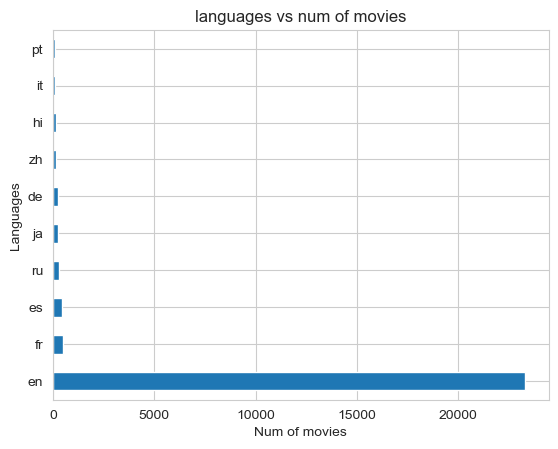

In [55]:
# plot a horizontal bar graph of the items in the Series
first_10.plot(kind='barh')
plt.xlabel('Num of movies')
plt.ylabel('Languages')
plt.title('languages vs num of movies')
plt.savefig('languages vs num of movies', bbox_inches='tight')
plt.show()

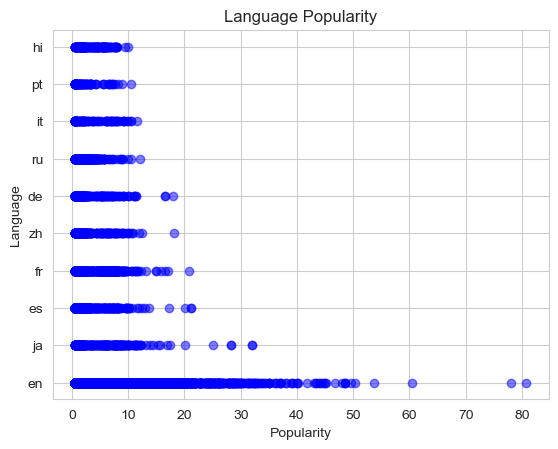

In [56]:
# filter the DataFrame to only include the languages in the list
df_filtered = movies_df_sorted[movies_df_sorted['original_language'].isin(first10_language)]

# create a scatter plot between the popularity column and the separate list of languages
plt.scatter(df_filtered['popularity'], df_filtered['original_language'], color='blue', alpha=0.5)

# set the axis labels and title
plt.xlabel('Popularity')
plt.ylabel('Language')
plt.title('Language Popularity')

plt.savefig('Language Popularity Scatter Plot', bbox_inches='tight')
# display the plot
plt.show()

<h1> CONCLUSION AND FUTURE WORKS

<h4>Summary of Findings

<h5>Domestic Vs Foreign markets over the years.

 **~** The Domestic market have been stugnating in the range of between 200 million dollars  
 and 400 million dollars over the years from 2010.
 
 **~** The Foreign market on the other hand has been on an uptrend since 2010.
 Grossing from 500 million dollars to a high of 2 billion dollars for movies like avator. Most movies in 2017 and 2018
 had a worldwide gross of &1 billion dollars on average.

<h6> Budget and Profits

**~** Top grossing movies from 2010 have a production budget ranging between 35 million dollars and 
    500 million dollars.

**~**  Profit can be seen as worldwide gross less production budget but note that this is a simplified
    approach as does not account for other revenue streams and costs.

**~** The profits margin for these movies have been looking really good having a median of 600 million Dollars
    and having maximum profits of over 2 Billion dollars.

<h6> Runtime for Movies

**~** Average runtime is 104 minutes.

**~** Top movies are longer, around 120 minutes.

**~** No direct correlation between runtime and worldwide gross, nor runtime and production budget

<h6> Genre

**~** Overhalf of the movies produced from 2010 have been Drama

**~** Drama, Comedy, Action and Adventure Genres having been the genres for top 
    grossing movies.

**~**  Drama movies have been most profitable since the profit margin was relatively good
     Compared to the production cost involved.

<h6> Release Month

**~** Most successfull months have been May,July and December

<h6> Original Language

**~** Top grossing movies from 2010 have an original language of Production as
    English.

**~** Other languages used are Japanese and Spanish which also have a few top grossing movies    

<h3> Actionable Insights

**1** Have a budget of at least 100 million dollars and ideally between $200-500 million.

**2** Produce a long movie, with a runtime of at least 2 hours.

**3** Produce an action/adventure, Drama, Comedy type of movie.

**4** Aim for a release date in May/June or November

**5** Decide whether to pursue Box Office or online distribution as characteristics differ


<h3> Future Work

As next steps, we would suggest the following:

**~** A reconciliation of the financial data, reviewing other reported sources to strengthen the reliability of the data

**~** Adjust for inflation using Consumer Price Index

**~** Further financial analysis e.g. how to allocate the production budget

**~** Investigate top creative talent (director, producer, actors)

**~** Analysis of additional revenue streamse e.g. merchandise

**~** Sentiment analysis of reviews

**~** Analysis of screenplay source e.g. based on book or original

**~** Analysis of certification ratings